In [267]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [268]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset='salary_year_avg')

In [269]:
df_DA_US_Exploded = df_DA_US.explode('job_skills').copy()

In [270]:
average_salary_by_skill = df_DA_US_Exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).copy()


In [271]:
top_paying_skills = average_salary_by_skill.sort_values(by='median', ascending=False).head(10).copy()

In [272]:
in_demand_skills = average_salary_by_skill.sort_values(by='count', ascending=False).head(10).copy()
in_demand_skills = in_demand_skills.sort_values(by='median', ascending=False)

In [273]:
top_paying_skills

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


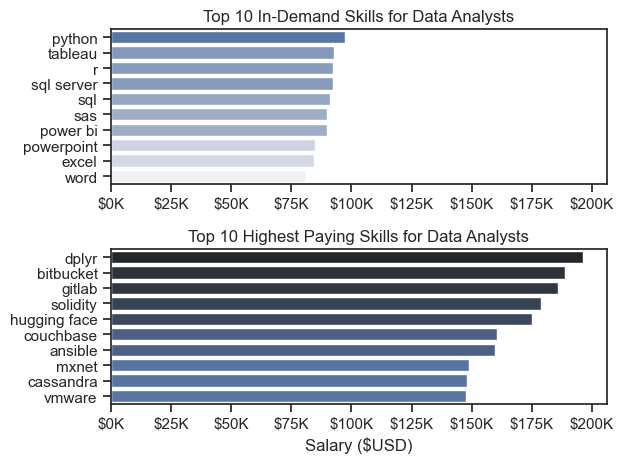

In [274]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style='ticks')
sns.barplot(data=in_demand_skills, x='median', y=in_demand_skills.index, ax=ax[0], hue='median', palette='light:b')
#in_demand_skills[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 In-Demand Skills for Data Analysts')
ax[0].legend().remove()
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.barplot(data=top_paying_skills, x='median', y=top_paying_skills.index, ax=ax[1], hue='median', palette='dark:b_r')
#top_paying_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Highest Paying Skills for Data Analysts')
ax[1].set_xlabel('Salary ($USD)')
ax[1].legend().remove()
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

ax[0].set_xlim(ax[1].get_xlim())

fig.tight_layout()

# Histograms


Text(0, 0.5, 'Number of Job Postings')

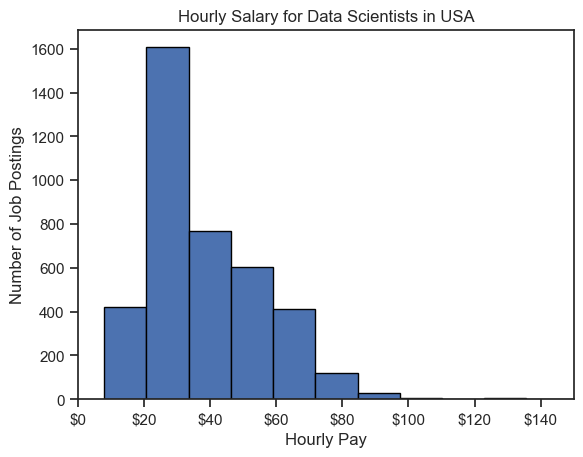

In [275]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US['salary_hour_avg'].plot(kind='hist', edgecolor='black', bins=30)
plt.xlim(0, 150)

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x)}'))
plt.title('Hourly Salary for Data Scientists in USA')
plt.xlabel('Hourly Pay')
plt.ylabel('Number of Job Postings')

<function matplotlib.pyplot.show(close=None, block=None)>

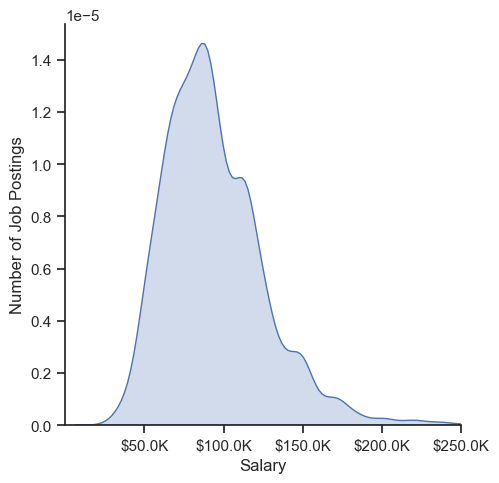

In [276]:
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${y/1000}K'))
plt.xlabel('Salary')
plt.ylabel('Number of Job Postings')
plt.xlim(1, 250000)
plt.show

# Box Plots

/var/folders/y6/0qzxmvxs4tj502z8bfcn0gy00000gn/T/ipykernel_32288/465539360.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


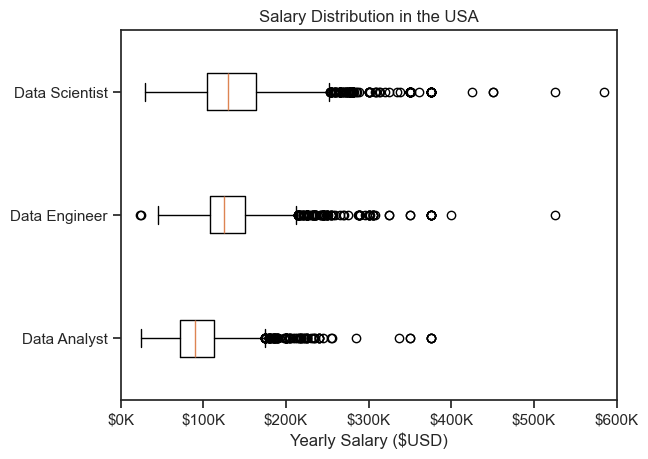

In [277]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_us = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_us = df_us.dropna(subset='salary_year_avg')

job_list = [df_us[df_us['job_title_short']== job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the USA')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

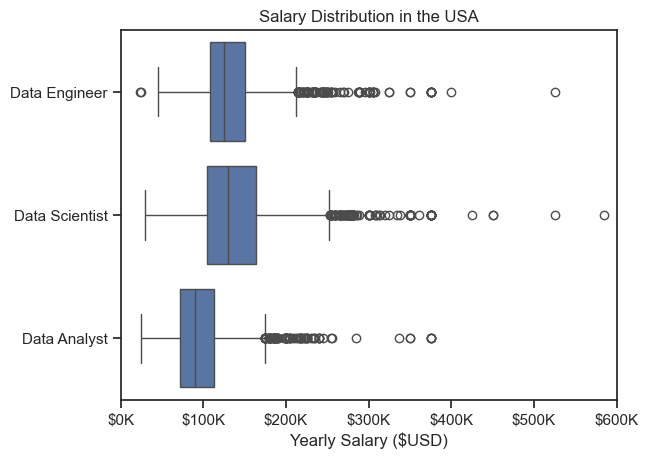

In [278]:
sns.boxplot(data=df_us, x='salary_year_avg', y='job_title_short')

plt.title('Salary Distribution in the USA')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

# Practice Problems

In [279]:
df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()
df_DS = df_DS.dropna(subset='salary_year_avg').copy()
df_DS_grouped = df_DS.groupby('job_country')['salary_year_avg'].median().reset_index().copy()
df_DS_grouped = df_DS_grouped.sort_values('salary_year_avg', ascending=False).copy()
df_DS_grouped = df_DS_grouped.head(10).copy()

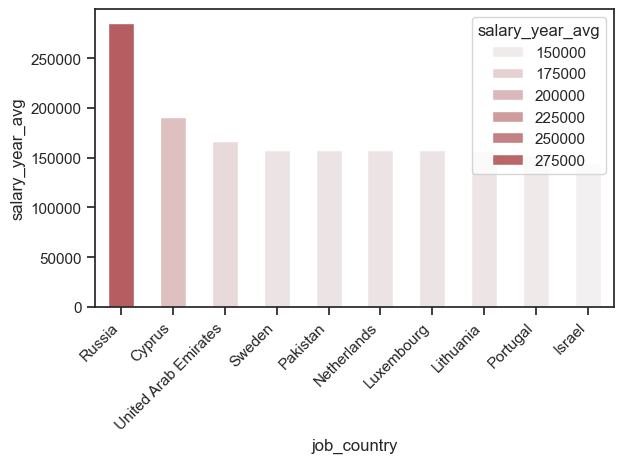

In [280]:
sns.barplot(data=df_DS_grouped, y='salary_year_avg', x='job_country', width=0.5, hue='salary_year_avg', palette='light:r')

plt.xticks(ha='right', rotation=45)
plt.tight_layout()
plt.show()

Text(25.194444444444443, 0.5, 'Count of Job Postings')

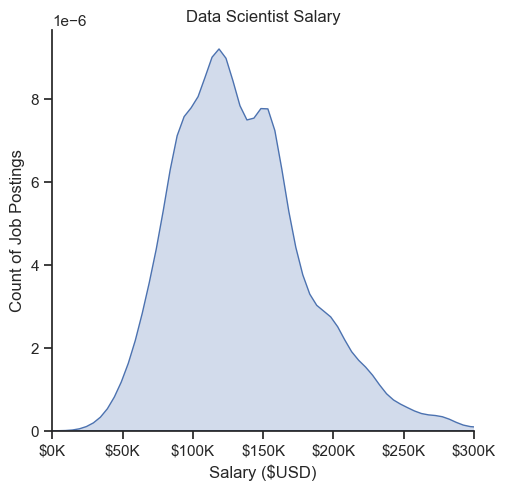

In [281]:

sns.displot(df_DS['salary_year_avg'], kind='kde', fill=True)

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.xlim(0, 300000)
plt.title('Data Scientist Salary')
plt.xlabel('Salary ($USD)')
plt.ylabel('Count of Job Postings')

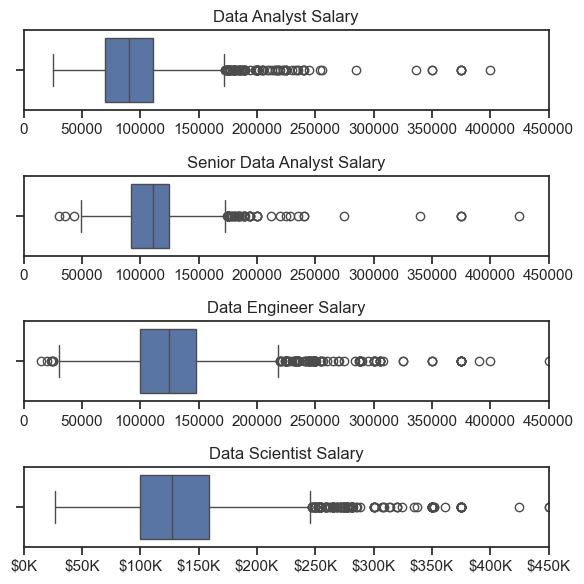

In [329]:
job_titles = ['Data Analyst',  'Senior Data Analyst', 'Data Engineer', 'Data Scientist']
df_job_titles = []

df_job_titles = df[df['job_title_short'].isin(job_titles)]

fig, axes = plt.subplots(len(job_titles),1, figsize=(6, 6), sharey=True)

# Loop through each job title and create a box plot on its own subplot
for i, job_title in enumerate(job_titles):
    # Filter data for the current job title
    subset_df = df_job_titles[df_job_titles['job_title_short'] == job_title]

    # Create the box plot on the current axis (axes[i])
    sns.boxplot(x='salary_year_avg', data=subset_df, ax=axes[i])
    axes[i].set_title(f'{job_title} Salary')
    axes[i].set_xlim(0, 450000)
    axes[i].set_xlabel('')
    ax=plt.gca()
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
    plt.tight_layout()

    


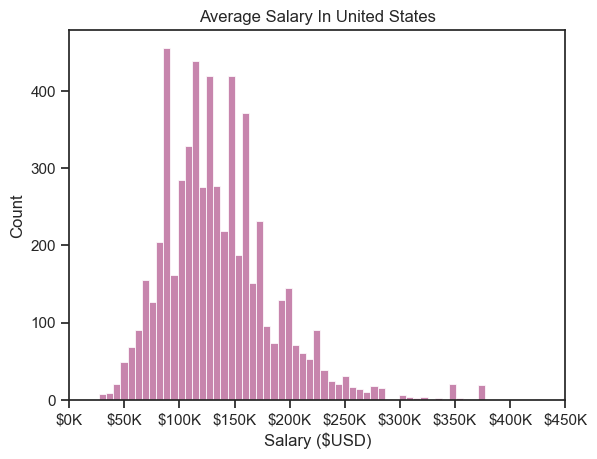

In [330]:
countries = ['United States']

df_countries = df[df['job_country'].isin(countries)].copy()

for i, country in enumerate(df_countries):
    subset_countries = df_countries[df_countries['job_country'] == country]

    ax=plt.gca()
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
    sns.histplot(x='salary_year_avg', data=subset_df)
    plt.xlim(0, 450000)
    plt.xlabel('Salary ($USD)')
    plt.title('Average Salary In United States')
    